<a href="https://colab.research.google.com/github/sujith2303/X_AI/blob/main/BasicNeuralNetwork_TrainingAndEvaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
! pip install tensorflow

In [24]:
! pip install numpy

In [25]:
! pip install keras

In [26]:
! pip install matplotlib

In [27]:
import numpy as np
import tensorflow as tf
import keras
from keras.layers import Dense, Flatten, Activation,Input,Dropout
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
class NetA:
    def __init__(self):
        pass
        #print('=====Training Net A======')
        #self.modelnet()
    def modelnet(self,epochs=50):
        (x_train, y_train), (self.x_test, self.y_test) = keras.datasets.cifar10.load_data()
        y_train = to_categorical(y_train)
        
        train_norm = x_train.astype('float32')
        test_norm = self.x_test.astype('float32')
        train_norm = train_norm / 255.0
        test_norm = test_norm / 255.0
        x_train = train_norm
        self.x_test = test_norm
        self.y_test =to_categorical(self.y_test)
        shape = x_train[0].shape
        x_input = Input(shape)
        x =Flatten()(x_input)
        x = Dense(10,activation ="softmax",name='output')(x)
        self.model = Model(x_input,x,name='NetA')
        opt = SGD(learning_rate=0.001, momentum=0.9)
        self.model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
        self.summarize()
        self.history = self.model.fit(x_train,y_train,epochs =epochs,batch_size=64,validation_split=0.1,shuffle=True)
        #self.plot()
        self._evaluate()

    def summarize(self):
        print(self.model.summary())
    def plot(self):
        history =self.history
        print('Plotting accuracy.................')
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
        print('Plotting loss.................')
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
        #self._evaluate()

    def _evaluate(self):
      self.result = self.model.evaluate(self.x_test,self.y_test,batch_size=128)
      


In [28]:
import numpy as np
import tensorflow as tf
import keras
from keras.layers import Dense, Flatten, Activation,Input, Dropout
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
class NetB:
    def __init__(self):
        pass
        #print('=====Training Net B======')
        #self.modelnet()
    def modelnet(self,epochs=50):
        (x_train, y_train), (self.x_test, self.y_test) = keras.datasets.cifar10.load_data()
        y_train = to_categorical(y_train)
        
        train_norm = x_train.astype('float32')
        test_norm = self.x_test.astype('float32')
# normalize to range 0-1
        train_norm = train_norm / 255.0
        test_norm = test_norm / 255.0
        self.y_test =to_categorical(self.y_test)
        x_train = train_norm
        self.x_test = test_norm
        shape = x_train[0].shape
        x_input = Input(shape)
        x =Flatten()(x_input)
        x=Dense(300,activation='relu')(x)
        x =Dropout(0.5)(x)
        x = Dense(10,activation ="softmax",name='output')(x)
        self.model = Model(x_input,x,name='NetA')
        opt = SGD(learning_rate=0.001, momentum=0.9)
        self.model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
        self.summarize()
        self.history = self.model.fit(x_train,y_train,epochs =epochs,batch_size=64,validation_split=0.1,shuffle=True)
        #self.plot()
        self._evaluate()
    def summarize(self):
        print(self.model.summary())
    def plot(self):
        history =self.history
        print('Plotting accuracy.................')
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
        print('Plotting loss.................')
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
        #self._evaluate()

    def _evaluate(self):
      self.result = self.model.evaluate(self.x_test,self.y_test,batch_size=128)
      


In [29]:
import numpy as np
import tensorflow as tf
import keras
from keras.layers import Dense, Flatten, Activation,Input,Conv2D, MaxPooling2D,Dropout
from keras.models import Model
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
class NetC:
    def __init__(self):
        #print('=====Training Net C======')
        #self.modelnet()
        pass
        
    def modelnet(self,epochs=50):
        (x_train, y_train), (self.x_test, self.y_test) = keras.datasets.cifar10.load_data()
        y_train = to_categorical(y_train)
        
        train_norm = x_train.astype('float32')
        test_norm = self.x_test.astype('float32')
# normalize to range 0-1
        train_norm = train_norm / 255.0
        test_norm = test_norm / 255.0
        self.x_test =test_norm
        self.y_test =to_categorical(self.y_test)
        shape = x_train[0].shape
        x_input = Input(shape)
        x = Conv2D(25,(5,5))(x_input)
        x = Activation('relu')(x)
        x = MaxPooling2D((3,3))(x)
        x = Flatten()(x)
        x = Dropout(0.5)(x)
        x = Dense(10,activation ="softmax",name='output')(x)
        self.model = Model(x_input,x,name='NetA')
        self.model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
        self.summarize()
        self.history = self.model.fit(train_norm,y_train,epochs =epochs,validation_split=0.1,shuffle=True,batch_size=64)
        #self.plot()
        self._evaluate()
    def summarize(self):
        print(self.model.summary())
    def plot(self):
        history =self.history
        print('Plotting accuracy.................')
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
        print('Plotting loss.................')
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()

    def _evaluate(self):
      self.result = self.model.evaluate(self.x_test,self.y_test,batch_size=128)
      


==== Training NetA ====
Model: "NetA"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 flatten_11 (Flatten)        (None, 3072)              0         
                                                                 
 output (Dense)              (None, 10)                30730     
                                                                 
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/2
704/704 [==============================] - 3s 4ms/step - loss: 1.9533 - accuracy: 0.3060 - val_loss: 1.8764 - val_accuracy: 0.3420
Epoch 2/2
79/79 [==============================] - 0s 3ms/step - loss: 1.8225 - accuracy: 0.3640


=======Train Accuracy=======> [0.30595555901527405, 0

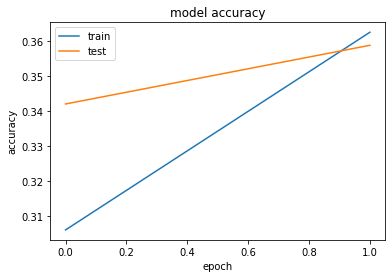

Plotting loss.................


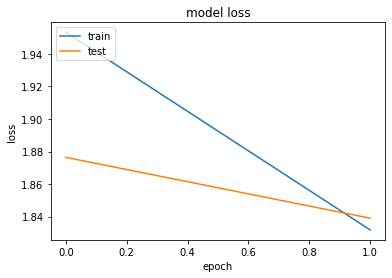

==== Training NetB ====
Model: "NetA"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 flatten_12 (Flatten)        (None, 3072)              0         
                                                                 
 dense_2 (Dense)             (None, 300)               921900    
                                                                 
 dropout_5 (Dropout)         (None, 300)               0         
                                                                 
 output (Dense)              (None, 10)                3010      
                                                                 
Total params: 924,910
Trainable params: 924,910
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/2
704/704 [========

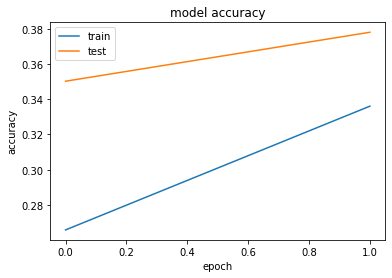

Plotting loss.................


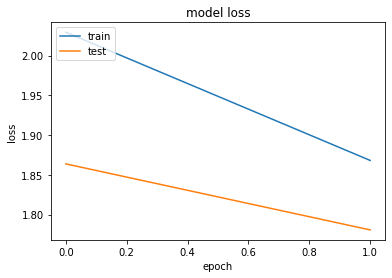

==== Training NetC ====
Model: "NetA"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 25)        1900      
                                                                 
 activation_3 (Activation)   (None, 28, 28, 25)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 9, 9, 25)         0         
 2D)                                                             
                                                                 
 flatten_13 (Flatten)        (None, 2025)              0         
                                                                 
 dropout_6 (Dropout)         (None, 2025)              0         
                                      

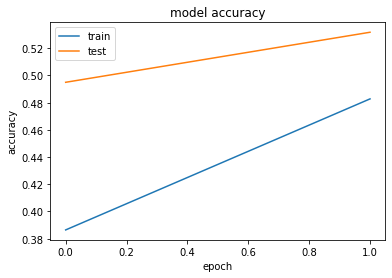

Plotting loss.................


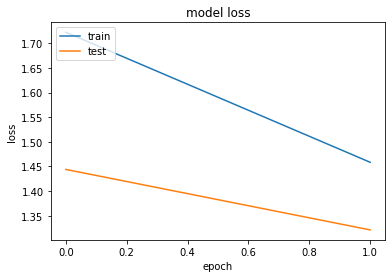

In [30]:
nets = [NetA(), NetB(), NetC()]
for net in nets:
    net_name = type(net).__name__
    print(f'==== Training {net_name} ====')
    net.modelnet(epochs = 50)
    print()
    print()
    print('=======Train Accuracy=======>',net.history.history['accuracy'][1])
    print('=======Test Accuracy ========> ',net.result[1])
    print('=======Visualization=========')
    net.plot()